# Self-tutorial on iris dataset

In [14]:
from __future__ import print_function, division

import sys
import os
import glob

import scipy
import numpy as np
import pandas as pd

import seaborn as sns

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn

import warnings
warnings.filterwarnings("ignore")

iris = pd.read_csv('bezdekIris.data', names = ['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'class'])

Split dataset into train/validation:

In [15]:
x = iris.values[:, 0:-1]
y = iris.values[:, -1]

from sklearn.model_selection import train_test_split

#from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.20, random_state = 1)

Define some models to run:

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = {
    'LR'   : LogisticRegression(solver = 'liblinear', multi_class = 'ovr'),
    'LDA'  : LinearDiscriminantAnalysis(),
    'KNN'  : KNeighborsClassifier(),
    'CART' : DecisionTreeClassifier(),
    'NB'   : GaussianNB(),
    'SVM'  : SVC(gamma = 'auto'),
}

Evaluate each model:

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

results = {}

for name in models:
    kfold = StratifiedKFold(n_splits = 10, random_state = 1)
    results[name] = cross_val_score(models[name], x_train, y_train, cv = kfold, scoring = 'accuracy')
    print('{0} score: {1} ± {2}'.format(name, results[name].mean(), results[name].std()))

LR score: 0.95 ± 0.05527707983925667
LDA score: 0.9749999999999999 ± 0.03818813079129868
KNN score: 0.9583333333333333 ± 0.041666666666666685
CART score: 0.9583333333333333 ± 0.041666666666666685
NB score: 0.9499999999999998 ± 0.05527707983925667
SVM score: 0.9833333333333332 ± 0.03333333333333335


Compare algorithms:

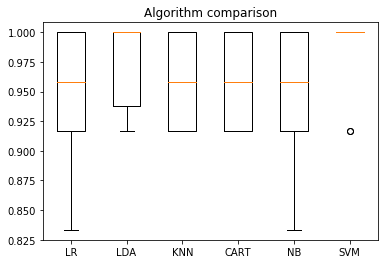

In [18]:
plt.boxplot(results.values(), labels = results.keys())
plt.title('Algorithm comparison')
plt.show()

SVM performs the best so fit the full training set by it:

In [19]:
model = SVC(gamma = 'auto')
model.fit(x_train, y_train)
predictions = model.predict(x_validation)

Evaluate the predictions:

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

